<a href="https://colab.research.google.com/github/manuelncsu/Bacterial-WGS-bioinformatics-workshop/blob/main/Day_3/Bioinformatics_course_Day_3_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

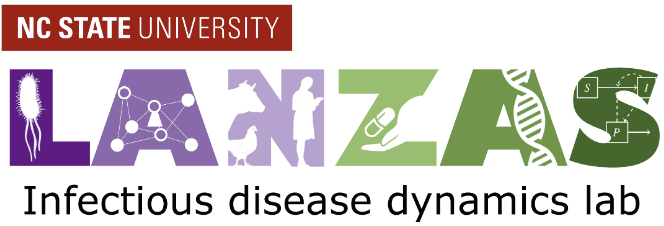

# **Bacterial WGS bioinformatics workshop**
## **Day 3 - Part 1.** AMR, virulence, and stress genes identification

##**Step 1:** Mounting your google drive into google colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


##Lets check if it works!

In [ ]:
ls

gdrive/  sample_data/


##Lets go to the workshop main folder

In [ ]:
cd /content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_1

/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_1


In [ ]:
ls

'Bioinformatics course_Day 3-Part_1'   condacolab_install.log   Genes_files/


##Install Conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


##Verify Conda installation

In [ ]:
!conda --version

conda 23.1.0


##Lets install some necessary packages in your Conda environment

In [ ]:
!conda install pandas numpy matplotlib

##**Step 2:** Lets inspect one of the genes files generated by AMRFinderPlus

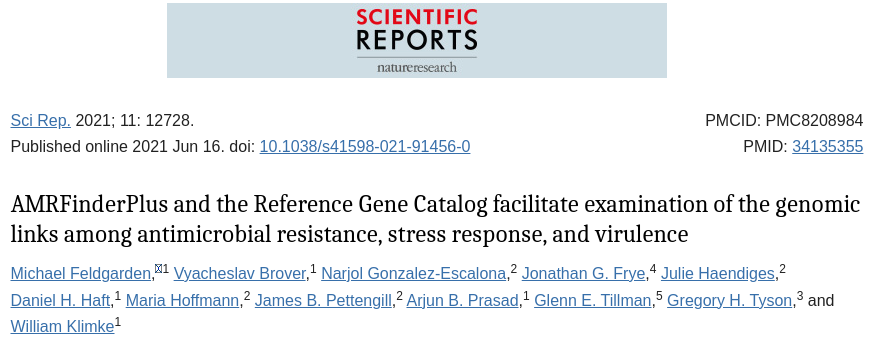

## Link to the article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8208984/


In [ ]:
import pandas as pd

# Read the TSV file
df = pd.read_csv('/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_1/Genes_files/SRX2195078-genes.tsv', sep='\t')

# Display the DataFrame
df

,Name,Protein identifier,Contig id,Start,Stop,Strand,Gene symbol,Sequence name,Scope,Element type,...,Method,Target length,Reference sequence length,% Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description
0,SRX2195078,NaN,SRX2195078_00816,1,507,+,vanZ1,glycopeptide resistance protein VanZ1,plus,AMR,...,EXACTX,169,169,100.0,100.00,169,CAJ68095.1,glycopeptide resistance protein VanZ1,NaN,NaN
1,SRX2195078,NaN,SRX2195078_02873,1,951,+,blaCDD,CDD family class D beta-lactamase,core,AMR,...,BLASTX,317,312,100.0,95.27,317,WP_009901927.1,extended-spectrum class D beta-lactamase CDD-1,NaN,NaN
2,SRX2195078,NaN,SRX2195078_03239,1,552,+,tcdR,glycosylating toxin sigma factor TcdR,plus,VIRULENCE,...,BLASTX,184,184,100.0,98.91,184,AJP10335.1,glycosylating toxin sigma factor TcdR,NaN,NaN
3,SRX2195078,NaN,SRX2195078_03240,1,7098,+,tcdB,glycosylating toxin TcdB,plus,VIRULENCE,...,BLASTX,2366,2366,100.0,99.96,2366,AJP10336.1,glycosylating toxin TcdB,NaN,NaN
4,SRX2195078,NaN,SRX2195078_03241,1,498,+,tcdE,holin-like glycosylating toxin export protein ...,plus,VIRULENCE,...,EXACTX,166,166,100.0,100.00,166,AJP10337.1,holin-like glycosylating toxin export protein ...,NaN,NaN
5,SRX2195078,NaN,SRX2195078_03243,1,8130,+,tcdA,glycosylating toxin TcdA,plus,VIRULENCE,...,BLASTX,2710,2710,100.0,99.93,2710,AJP10339.1,glycosylating toxin TcdA,NaN,NaN
6,SRX2195078,NaN,SRX2195078_03244,1,696,+,tcdC,glycosylating toxin anti-sigma factor TcdC,plus,VIRULENCE,...,BLASTX,232,232,100.0,99.57,232,AJP10340.1,glycosylating toxin anti-sigma factor TcdC,NaN,NaN
7,SRX2195078,NaN,SRX2195078_03496,1,699,+,vanR-Cd,vancomycin resistance response regulator trans...,plus,AMR,...,EXACTX,233,233,100.0,100.00,233,AXB64454.1,vancomycin resistance response regulator trans...,NaN,NaN
8,SRX2195078,NaN,SRX2195078_03497,1,1140,+,vanS-Cd,VanG-Cd-type vancomycin resistance histidine k...,plus,AMR,...,BLASTX,380,380,100.0,99.47,380,AXB64455.1,VanG-Cd-type vancomycin resistance histidine k...,NaN,NaN
9,SRX2195078,NaN,SRX2195078_03498,1,1098,+,vanG,D-alanine--D-serine ligase VanG-Cd,plus,AMR,...,BLASTX,366,366,100.0,99.18,366,PBI24747.1,D-alanine--D-serine ligase VanG-Cd,NaN,NaN


# Lets combine all the files into a single one

In [ ]:
import os
import pandas as pd

# Define the directory containing gene files
directory = "/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_1/Genes_files"

# List to store DataFrames
dfs = []

# Loop through files in the directory
for filename in os.listdir(directory):
    if filename.endswith("genes.tsv"):
        file_path = os.path.join(directory, filename)

        # Read each file into a DataFrame
        df = pd.read_csv(file_path, sep='\t')

        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames into one
combined_data = pd.concat(dfs, ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_data.to_csv("/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_1/combined_data.csv", index=False)


## Open the combined table

In [ ]:
ls

'Bioinformatics course_Day 3-Part_1'   combined_data.csv   condacolab_install.log   Genes_files/


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('combined_data.csv')

# Display the DataFrame
df

,Name,Protein identifier,Contig id,Start,Stop,Strand,Gene symbol,Sequence name,Scope,Element type,...,Method,Target length,Reference sequence length,% Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description
0,SRX2195082,NaN,SRX2195082_01518,1,552,+,tcdR,glycosylating toxin sigma factor TcdR,plus,VIRULENCE,...,EXACTX,184,184,100.0,100.00,184,AJP10335.1,glycosylating toxin sigma factor TcdR,NaN,NaN
1,SRX2195082,NaN,SRX2195082_01519,1,7098,+,tcdB,glycosylating toxin TcdB,plus,VIRULENCE,...,BLASTX,2366,2366,100.0,99.96,2366,AJP10336.1,glycosylating toxin TcdB,NaN,NaN
2,SRX2195082,NaN,SRX2195082_01520,1,498,+,tcdE,holin-like glycosylating toxin export protein ...,plus,VIRULENCE,...,EXACTX,166,166,100.0,100.00,166,AJP10337.1,holin-like glycosylating toxin export protein ...,NaN,NaN
3,SRX2195082,NaN,SRX2195082_01522,1,8130,+,tcdA,glycosylating toxin TcdA,plus,VIRULENCE,...,BLASTX,2710,2710,100.0,99.93,2710,AJP10339.1,glycosylating toxin TcdA,NaN,NaN
4,SRX2195082,NaN,SRX2195082_01523,1,696,+,tcdC,glycosylating toxin anti-sigma factor TcdC,plus,VIRULENCE,...,BLASTX,232,232,100.0,99.14,232,AJP10340.1,glycosylating toxin anti-sigma factor TcdC,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,SRX2195080,NaN,SRX2195080_03078,1,924,+,blaCDD-2,extended-spectrum class D beta-lactamase CDD-2,core,AMR,...,ALLELEX,308,308,100.0,100.00,308,WP_021361759.1,extended-spectrum class D beta-lactamase CDD-2,NaN,NaN
123,SRX2195080,NaN,SRX2195080_03455,1,699,+,vanR-Cd,vancomycin resistance response regulator trans...,plus,AMR,...,EXACTX,233,233,100.0,100.00,233,AXB64454.1,vancomycin resistance response regulator trans...,NaN,NaN
124,SRX2195080,NaN,SRX2195080_03456,1,1140,+,vanS-Cd,VanG-Cd-type vancomycin resistance histidine k...,plus,AMR,...,EXACTX,380,380,100.0,100.00,380,AXB64455.1,VanG-Cd-type vancomycin resistance histidine k...,NaN,NaN
125,SRX2195080,NaN,SRX2195080_03457,1,1098,+,vanG,D-alanine--D-serine ligase VanG-Cd,plus,AMR,...,EXACTX,366,366,100.0,100.00,366,PBI24747.1,D-alanine--D-serine ligase VanG-Cd,NaN,NaN


##This is an example of how can you visualize this output

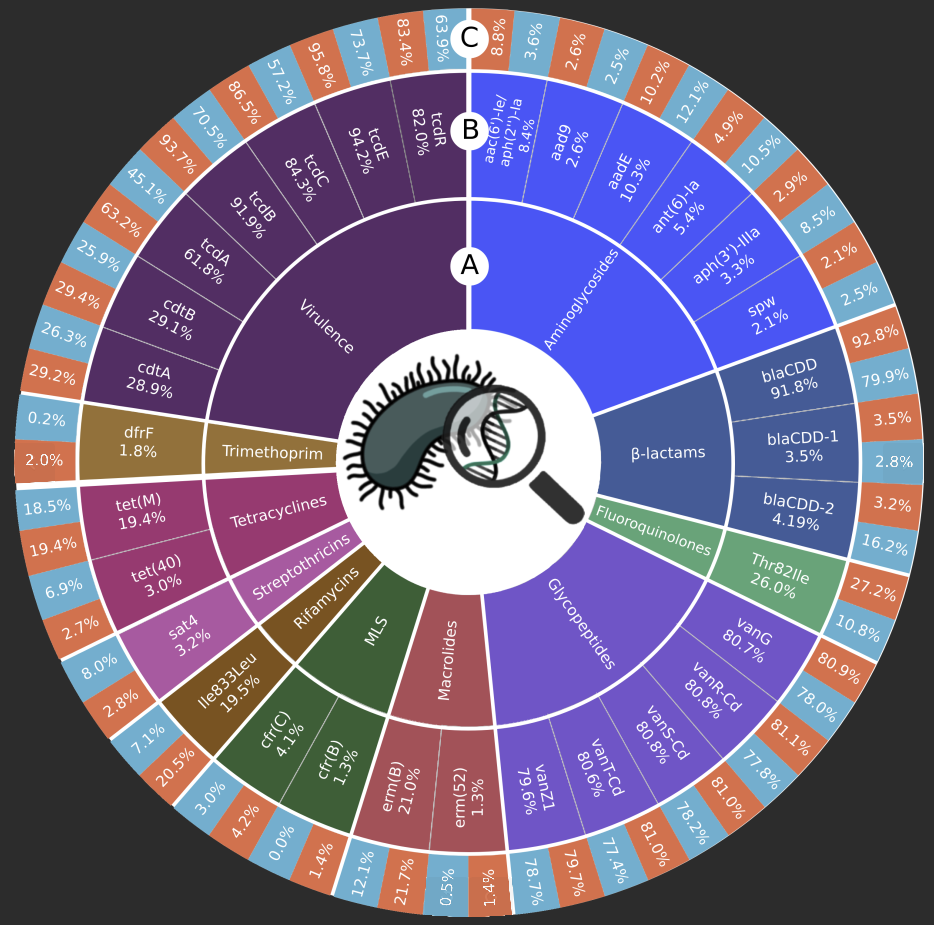